In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import isnan
from numpy import nan
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from numpy import percentile
from scipy import stats
import statistics
from scipy.stats import pearsonr
from sklearn.preprocessing import PowerTransformer

In [2]:
data = pd.read_csv('../data/MDG_Export_20191227.csv')
data.head(1)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,


In [3]:
data.isnull().sum()

CountryCode     0
Country         0
SeriesCode      0
MDG             0
Series          0
               ..
Footnotes.28    0
Type.28         0
2019            0
Footnotes.29    0
Type.29         0
Length: 95, dtype: int64

In [4]:
# - Checking for all the dataframe columns to get a better understanding 
data.columns

Index(['CountryCode', 'Country', 'SeriesCode', 'MDG', 'Series', '1990',
       'Footnotes', 'Type', '1991', 'Footnotes.1', 'Type.1', '1992',
       'Footnotes.2', 'Type.2', '1993', 'Footnotes.3', 'Type.3', '1994',
       'Footnotes.4', 'Type.4', '1995', 'Footnotes.5', 'Type.5', '1996',
       'Footnotes.6', 'Type.6', '1997', 'Footnotes.7', 'Type.7', '1998',
       'Footnotes.8', 'Type.8', '1999', 'Footnotes.9', 'Type.9', '2000',
       'Footnotes.10', 'Type.10', '2001', 'Footnotes.11', 'Type.11', '2002',
       'Footnotes.12', 'Type.12', '2003', 'Footnotes.13', 'Type.13', '2004',
       'Footnotes.14', 'Type.14', '2005', 'Footnotes.15', 'Type.15', '2006',
       'Footnotes.16', 'Type.16', '2007', 'Footnotes.17', 'Type.17', '2008',
       'Footnotes.18', 'Type.18', '2009', 'Footnotes.19', 'Type.19', '2010',
       'Footnotes.20', 'Type.20', '2011', 'Footnotes.21', 'Type.21', '2012',
       'Footnotes.22', 'Type.22', '2013', 'Footnotes.23', 'Type.23', '2014',
       'Footnotes.24', 'Type

In [5]:
# Dropping data that doesn't contribute valid infomation in this data 

df = data.drop(['Footnotes','Footnotes.1','Footnotes.2','Footnotes.3','Footnotes.4','Footnotes.5','Footnotes.6','Footnotes.7','Footnotes.8','Footnotes.9','Footnotes.10','Footnotes.11','Footnotes.12',
    'Footnotes.13','Footnotes.14','Footnotes.15','Footnotes.16','Footnotes.17','Footnotes.18','Footnotes.19','Footnotes.20','Footnotes.21','Footnotes.22','Footnotes.23','Footnotes.24','Footnotes.25','Footnotes.26','Footnotes.27','Footnotes.28','Footnotes.29'], axis = 1)
dataset = df.drop(['Type','Type.1','Type.2','Type.3','Type.4','Type.5','Type.6','Type.7','Type.8','Type.9','Type.10','Type.11','Type.12','Type.13','Type.14','Type.15','Type.16','Type.17','Type.18','Type.19','Type.20','Type.21','Type.22'
               ,'Type.23','Type.24','Type.25','Type.26','Type.27','Type.28','Type.29'], axis = 1)


In [6]:
dataset.head(2)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,,,,,...,2.1,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,2493.6,1426.5,1375.1,1320.1,...,8470.8,12251.4,,,,,,,,


In [7]:
dataset['Country'].value_counts()

Luxembourg                     3
Benin                          3
Kiribati                       3
United States                  3
Sudan                          3
                              ..
Zimbabwe                       3
Romania                        3
Cyprus                         3
United Arab Emirates           3
United Republic of Tanzania    3
Name: Country, Length: 230, dtype: int64

- There are 230 countries represented in the dataset

##### Checking for Missing values 

In [8]:
dataset['Country'].isnull().sum()

0

In [9]:
dataset['Series'].isnull().sum()

0

In [10]:
Years = dataset.drop(['Country','CountryCode', 'SeriesCode', 'MDG', 'Series'], axis = 1)
years = Years.isnull().sum().sum()
years

4

- For Missing Values


- For Country and Series there are 0 missing values and by Year there are 4 missing values from the year 1990 till 2019. The missing values will not be dropped but will be imputed as i continue to answer the question to follow.

##### Who are the top and bottom 5 countries in terms of C02 emissions in 1990 and what are their emissions?

In [11]:
CO2 = dataset.loc[dataset['Series'] == 'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)'].replace([' '],np.NaN)
CO2.head(2)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,2493.6,1426.5,1375.1,1320.1,...,8470.8,12251.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,3971.4,2387.2,2343.2,1928.8,...,4415.1,4668.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#####  The dataset contains missing values in some rows - i will try to impute them 


In [12]:
# - Total number of Missing values in each column
CO2.isnull().sum().sum()

2325

In [13]:
CO2 = CO2.fillna(CO2['CountryCode'].mean(),inplace = False)
CO2.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,2493.6,1426.5,1375.1,1320.1,...,8470.8,12251.4,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,3971.4,2387.2,2343.2,1928.8,...,4415.1,4668.1,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,81220.4,81935.4,82294.8,86500.9,...,119276.5,121755.4,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217
10,16,American Samoa,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",439.465,439.465,439.465,439.465,439.465,...,439.465,439.465,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217
13,20,Andorra,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",439.465,439.465,439.465,439.465,439.465,...,517,491.4,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217


#### Who are the top and bottom 5 countries in terms of C02 emissions in 1990 and what are their emissions? How has this changed by 2011?


In [14]:
#Grouping by country and 1990,then changing data type from object to float 
CO2_1990 = CO2.groupby('Country')['1990'].apply(lambda Country : Country.astype(float).sum())

#Sorting my dataframe to see the bottom  countries in the 1990 column
CO2_1990.reset_index().sort_values(['1990'], ascending = False)

,Country,1990
217,United States,4823557.1
41,China,2460744.0
100,Japan,1094287.8
92,India,690576.8
215,United Kingdom,555902.5
...,...,...
104,Kiribati,22.0
186,Somalia,18.3
168,Saint Helena,7.3
148,Niue,3.7


#### The Top 5 countries in  C02 emissions in 1990 were:

United States, China, Japan, India and United Kingdom	

#### The Bottom 5 countries in  C02 emissions in 1990 were:

Kiribati, Somalia, Saint, Helena, Niue and Yemen

In [15]:
CO2_2011 = CO2.groupby('Country')['2011'].apply(lambda Country : Country.astype(float).sum())

#Sorting my dataframe to see the bottom  countries in the 2011 column
CO2_2011.reset_index().sort_values(['2011'], ascending = False)

,Country,2011
41,China,9019518.2
217,United States,5305569.6
92,India,2074344.9
166,Russian Federation,1808073.0
100,Japan,1187657.0
...,...,...
139,Nauru,51.3
115,Liechtenstein,51.3
224,Wallis and Futuna Islands,25.7
168,Saint Helena,11.0


- Looking at the top 5 countries in CO2 emission 2011 as compared to 1990 United States, China, Japan and India still remain on the list even after 21 years with China occupying the 1st Position. The Russian Federation also made in the top 5 list replacing the United Kingdom


- The bottom 5 in 2011 vs 1990 is very different only one one Country that was on the list in 1990 is still in 2011 which is Niue the other countries have increased or decreased drastically in their CO2 emission.

#### Do you spot any problems with the data? If so, fix it.


- My dataset contained alot of missing values which i fixed by imputing the missing data instead of dropping them because anysort of data is important.

#### Calculate the mean and median C02 emissions for 1990. Why do you think these values differ?


In [16]:
x = CO2_1990.mean()
print("Mean is :", x) 

Mean is : 71742.08432892249


In [17]:
y = CO2_1990.median()
print("Median is :", y) 

Median is : 1164.25


These values differ because the mean is the avarage of the dataset while the median we have calculated is the only the middle value in our dataset of CO2 emission

#### Calculate the minimum, maximum and interquartile range of the CO2 emissions for 1990. Using this information, and the mean and median, what does this tell you about the distribution of CO2 emissions?


In [18]:
CO2_1990_min, CO2_1990_max = CO2_1990.min(), CO2_1990.max()
print('Minimum value in CO2 1990 is: %.3f' % CO2_1990_min)

print('Maximum value in CO2 1990 is: %.3f' % CO2_1990_max)

Minimum value in CO2 1990 is: -2999.600
Maximum value in CO2 1990 is: 4823557.100


In [48]:
IQR = stats.iqr(CO2_1990, interpolation = 'midpoint') 
IQR

20849.284782608695

- Taking into account the mean, median and IQR we are most likely going to have a positive distribution with the mean being more than the median 

#### Create a histogram of the CO2 emissions for 1990. Is this what you expected from your answers in questions 3 and 4?


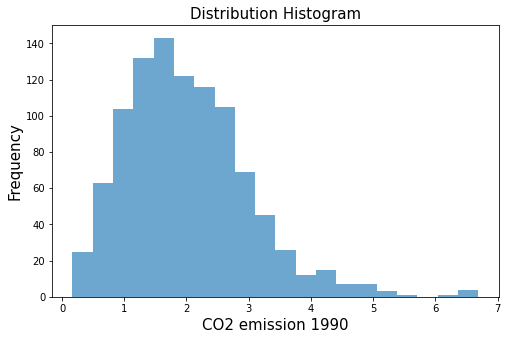

In [20]:
plotCO2 = CO2_1990 
plt.figure(figsize = [8,5])
plotCO2 = np.random.gamma(4, 0.5, 1000)
plt.xlabel('CO2 emission 1990', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution Histogram',fontsize = 15)
plot = plt.hist(plotCO2, bins = 20, alpha = 0.65)

- Yes this is what i expected because the values of the mean and median are different that means that our histogram plot will be Skewed and in our plot the histogram is Skewed to the right

#### Calculate the standard deviation and standard error of the mean for CO2 emissions in 1990. How is the standard error different from the standard deviation?


In [21]:
sd = statistics.stdev(CO2_1990)
print('The standard deviation  value in CO2 1990 is: %.3f' % sd)

sde = stats.sem(CO2_1990)
print('The standard deviation  value in CO2 1990 is: %.3f' % sde)


The standard deviation  value in CO2 1990 is: 371346.924
The standard deviation  value in CO2 1990 is: 24485.891


The standard deviation (SD) measures the amount of variability, or dispersion, for a subject set of data from the mean, while the standard error of the mean (SEM) measures how far the sample mean of the data is likely to be from the true population mean. 

#### Create a line graph to show C02 emissions in Brazil, Russia, China, India, the USA and South Africa over time. What does the graph tell you about the difference and change in C02 emissions in these countries?


In [22]:
BRICS = dataset.iloc[[82,124,499,277,562,652]]
BRICS =  BRICS.drop(['1990', '1991', '1992','1993', '1994','1995','1996','1997',  '1998', '1999','2000','2001','2002', '2003'
                     , '2004','2005','2006','2007','2008','2009','2010','2011', '2012','2013','2014','2015','2016','2017','2018','2019'],axis=1)
BRICS

,CountryCode,Country,SeriesCode,MDG,Series
82,76,Brazil,749,Y,"Carbon dioxide emissions (CO2), thousand metri..."
124,156,China,749,Y,"Carbon dioxide emissions (CO2), thousand metri..."
499,643,Russian Federation,749,Y,"Carbon dioxide emissions (CO2), thousand metri..."
277,356,India,749,Y,"Carbon dioxide emissions (CO2), thousand metri..."
562,710,South Africa,749,Y,"Carbon dioxide emissions (CO2), thousand metri..."
652,840,United States,749,Y,"Carbon dioxide emissions (CO2), thousand metri..."


In [23]:
KY = Years.iloc[[82,124,499,277,562,652]]

In [24]:
dataframe = pd.concat([BRICS, KY], axis=1).replace([' '],np.NaN)
dataframe.head(3)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
82,76,Brazil,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",208887,219330.6,220705.7,230738.6,242154,...,419754.2,439412.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,156,China,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2460744,2584538.3,2695982.1,2878694,3058241.3,...,8256969.2,9019518.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,643,Russian Federation,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,2081840.2,1941203.5,1701132.3,...,1742540.1,1808073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
Dataframe = dataframe.fillna(CO2['CountryCode'].mean(),inplace = False)

In [26]:
new_df = Dataframe.groupby('Country')[('1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011')].apply(lambda x : x.astype(float).sum()).reset_index().groupby('Country')[('1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011')].apply(lambda x : x.astype(float).sum()).reset_index()


In [27]:
new_df.dtypes.value_counts()

float64    22
object      1
dtype: int64

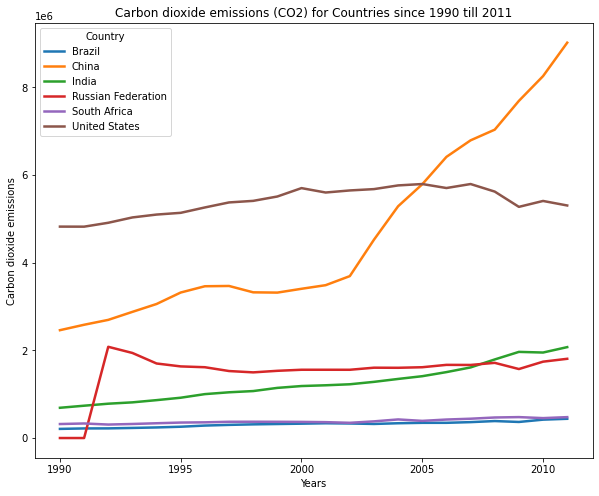

In [28]:
line_graph = new_df.set_index("Country").T
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Carbon dioxide emissions (CO2) for Countries since 1990 till 2011')
ax.set_ylabel('Carbon dioxide emissions')
ax.set_xlabel('Years')
_ = line_graph.plot(ax=ax, linewidth=2.5)

#### Observation 

- From the above graph we can see that Countries like Brazil and South Africa have had managed to keep their emission at a steady and very low trend.

- The Russian Federation had an increase in their CO2 emission in the early 1990's but managed to keep it under 2 million CO2e 

- China is the only country with a high and continuous trend

- As much as India's emission has been kept under 2 million CO2e it can expected that beyond 2011 their CO2e might have increased as they had a growing trend of emission.

#### What is the mean and standard deviation for land area covered by forest in 1990? Why do you think the standard deviation is so large?


In [29]:
Area = dataset.loc[dataset['Series'] == 'Proportion of land area covered by forest, percentage'].replace([' '],np.NaN)
Area.head(2)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,NaN,NaN,NaN,...,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,NaN,NaN,NaN,...,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
Area = Area.fillna(Area['CountryCode'].mean(),inplace = False)


In [31]:
#Grouping by country and 1990,then changing data type from object to float 
Arear_90 = Area.groupby('Country')['1990'].apply(lambda Country : Country.astype(float).sum())

In [32]:
x = Arear_90.mean()
print("Mean is :", x) 

Mean is : 45.34850661625708


In [33]:
sda = statistics.stdev(Arear_90)
print('The standard deviation for land covered by Area in 1990 is: %.3f' % sda)


The standard deviation for land covered by Area in 1990 is: 74.346


#### Create histograms for land area covered by forest and percentage of area protected in 1990. Describe the distributions.


In [34]:
Protected = dataset.loc[dataset['Series'] == 'Terrestrial and marine areas protected to total territorial area, percentage'].replace([' '],np.NaN)
Protected.head(2)

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.46,NaN,NaN,NaN,NaN,NaN
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.91,NaN,NaN,NaN,NaN,NaN


In [35]:
Protected = Protected.fillna(Protected['CountryCode'].mean(),inplace = False)

In [36]:
#Grouping by country and 1990,then changing data type from object to float 
Protected_90 = Protected.groupby('Country')['1990'].apply(lambda Country : Country.astype(float).sum())

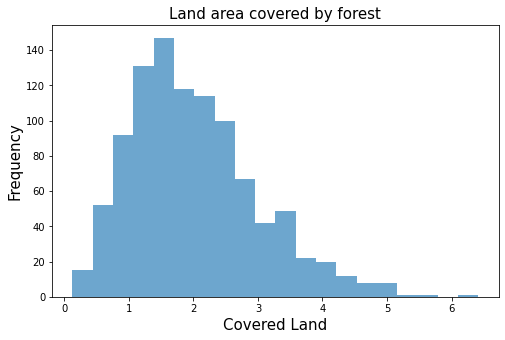

In [51]:
plt.figure(figsize = [8,5])
Arear_90 = np.random.gamma(4, 0.5, 1000)
plt.xlabel('Covered Land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Land area covered by forest',fontsize = 15)
plot = plt.hist(Arear_90, bins = 20, alpha = 0.65)

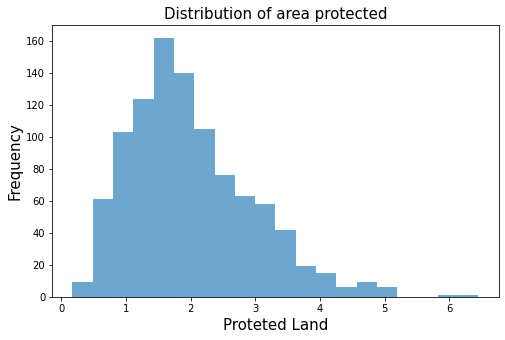

In [52]:
plt.figure(figsize = [8,5])
Protected_90 = np.random.gamma(4, 0.5, 1000)
plt.xlabel('Proteted Land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of area protected',fontsize = 15)
plot = plt.hist(Protected_90, bins = 20, alpha = 0.65)

- Both graphs are positively stewed to the right.

#### Create a scatterplot with a regression line using seaborn.regplot to show the relationship between the proportion of land area covered by forest and the percentage of area protected in 2000.


In [39]:
Arear_00 = Area.groupby('Country')['2000'].apply(lambda Country : Country.astype(float).sum())

In [40]:
Protected_00 = Protected.groupby('Country')['2000'].apply(lambda Country : Country.astype(float).sum())

In [41]:
Combined = pd.concat([Arear_00 , Protected_00],axis=1)
Combined

,2000,2000
Country,,
Afghanistan,2.100000,0.360000
Albania,28.100000,0.480000
Algeria,0.700000,5.980000
American Samoa,90.000000,0.060000
Andorra,35.600000,9.250000
...,...,...
Western Sahara,2.700000,0.000000
Yemen,1.000000,0.360000
Yugoslavia [former Socialist Federal Republic],439.465217,439.465217


In [42]:
Combined.columns = ['Land Area', 'Protected Area']
Combined

,Land Area,Protected Area
Country,,
Afghanistan,2.100000,0.360000
Albania,28.100000,0.480000
Algeria,0.700000,5.980000
American Samoa,90.000000,0.060000
Andorra,35.600000,9.250000
...,...,...
Western Sahara,2.700000,0.000000
Yemen,1.000000,0.360000
Yugoslavia [former Socialist Federal Republic],439.465217,439.465217


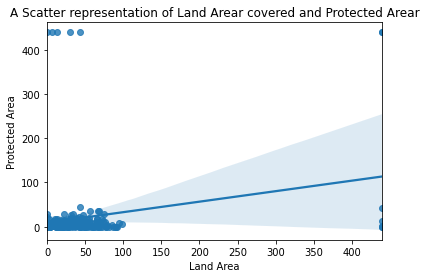

In [53]:
sns.regplot(x = Combined['Land Area'], y = Combined['Protected Area'], data=Combined);
_ = plt.title("A Scatter representation of Land Arear covered and Protected Arear")


#### What is the relationship between these two variables?

The reltionship between the two variables is a weak positive linear relationship

#### Describe any patterns in the scatterplot.

- It is not easy to spot a pattern within our scatter plot, though the variable increase in the same direction we can't assume that they are directly proportional

#### Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?).

- The scatter plot reflects outliers. In simple terms an outlier is an observation point that is distant from other observations.


- In our scatter plot we seem to have Global outliers. Global outliers is when a data point(s) is considered a global outlier if its value is far outside the entirety of the data set in which it is found.

#### Since neither forested land area nor protected area is normally distributed, we will need to log transform these variables in order to calculate a correlation coefficient. Log transform the variables and show the transformed distributions in a histogram.


In [44]:
Logdata= Combined[['Land Area','Protected Area']].apply(np.log)
Logdata

,Land Area,Protected Area
Country,,
Afghanistan,0.741937,-1.021651
Albania,3.335770,-0.733969
Algeria,-0.356675,1.788421
American Samoa,4.499810,-2.813411
Andorra,3.572346,2.224624
...,...,...
Western Sahara,0.993252,-inf
Yemen,0.000000,-1.021651
Yugoslavia [former Socialist Federal Republic],6.085559,6.085559


In [45]:
Log_transform = Logdata[~Logdata.isin([np.nan, np.inf, -np.inf]).any(1)]
Log_transform.head()

,Land Area,Protected Area
Country,,
Afghanistan,0.741937,-1.021651
Albania,3.335770,-0.733969
Algeria,-0.356675,1.788421
American Samoa,4.499810,-2.813411
Andorra,3.572346,2.224624


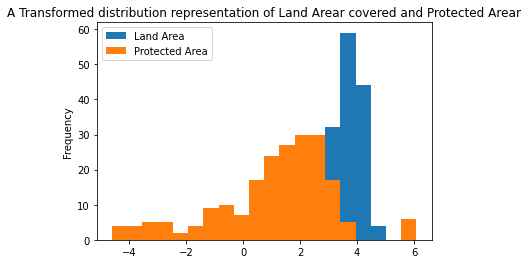

In [56]:
Log_transform.plot.hist(bins=20)
_ = plt.title("A Transformed distribution representation of Land Arear covered and Protected Arear")

#### Using the pearsonr function from the scipy.stats module, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between proportion of land area covered by forest and the percentage of area protected (as measured in 1990 and log transformed). See help(pearsonr) for help on this function.

Hypothesis Statements 


-  Null Hypothesis : There is NO signifcant correlation between land area and percentage of protected area


- Alt Hypothesis : There is a signifcant correlation between land area and percentage of protected area


In [47]:
stats.pearsonr(Log_transform['Land Area'],Log_transform['Protected Area'])

(0.13624239547913206, 0.050859660933934465)

- The relationship betweeen proportion of land area covered by forest and the percentage of area protected is a weak positive one, with a correalation value of 0.13



- corresponding p-value is 0.05 which means we do not accept our null hypothesis that there is NO signifcant correlation between land area and percentage of protected area, because of our p-value we accept the alt hypothesis and also taking into account that we do have a correlation even though it is still a weak correlation there is one.

In [58]:
from scipy.stats import spearmanr

In [63]:
correlation, pval = spearmanr(Log_transform['Land Area'],Log_transform['Protected Area'])
print(f'correlation={correlation:.6f}, p-value={pval:.6f}')

correlation=0.096543, p-value=0.167449


-We have a monotonic relationship this time our correlation increased while the p-value decreased.

-Another point to mention is that the Spearman's correlation determines the strength and direction of the monotonic relationship between the two variables rather than the strength and direction of the linear relationship between your the variables, which is what Pearson's correlation determines.

As said with our p-value decreasing looking into our hypothesis statemnets, we would have to accept our Null hypothesis that there's there's no signifcant correlation between land area and percentage of protected area,